# Impacto de los Proyectos de Ciencia, Tecnología e Innovación en el Desarrollo Regional: Un Análisis Cuantitativo por Áreas Temáticas y Financiamiento


# **1. Introducción**
## **Tema Principal**
 Explorar cómo los proyectos de investigación financiados contribuyen al desarrollo regional en Colombia.

# **2. Planteamiento del Problema**
## **Contexto:**
 Aunque se han financiado numerosos proyectos en Colombia, persisten desigualdades en el desarrollo regional. Esto plantea la pregunta de si las inversiones en investigación están teniendo un impacto real en el crecimiento económico y social en las diferentes regiones.
## **Problema Central:**
 Existe una falta de claridad sobre cómo las inversiones en proyectos de investigación están relacionadas con indicadores de desarrollo regional.

 ## **Objetivo**
 Identificar patrones, tendencias y posibles áreas de mejora en la distribución y el impacto de los proyectos.

## **Preguntas Clave**
¿En qué áreas temáticas se están concentrando los proyectos de investigación?

¿Cómo están distribuidos regionalmente los proyectos?

¿Qué tipo de financiación predomina y cómo afecta al monto total?
## **Objetivo Específico:**
 Analizar los datos de proyectos financiados para identificar tendencias en las áreas temáticas, el monto financiado y la distribución geográfica, como primer paso para evaluar su impacto.

##**Alcance del proyecto**
 Evaluar la distribución geográfica, temática y financiera de los proyectos de investigación financiados en Colombia entre 2007 y 2020 para identificar patrones, tendencias y brechas que impactan el desarrollo regional.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/Proyectos-de-Investigaci-n-e-Innovaci-n-evaluados-/6hgx-q9pi/about_data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
ruta='https://raw.githubusercontent.com/Diazbj/ProyectoAnalisisDeDatos/refs/heads/main/DataSetProyectosInvestigacion.csv'


##**3. Cargar Datos**

In [ ]:
dfOriginal=pd.read_csv(ruta)
dfOriginal.head()

,PROYECTO_ID,CONVOCATORIA_ID,ANO_CONVOCATORIA,DESC_CONVOCATORIA,CODIGO_PROYECTO,TITULO_PROYECTO,FECHA_REGISTRO,FECHA_APROBACION,ENTIDAD_EJECUTA,TIPO_FINANCIACION,...,NME_DEPTO_ENTIDAD,COD_DANE_CIUDAD_PRY,NME_CIUDAD_PRY,COD_DANE_DEPTO_PRY,NME_DEPTO_PRY,TPO_PROYECTO,NME_TIPO_PROYECTO,MONTO_FINANCIADO_AP,MONTO_CONTRAPARTIDA_AP,MONTO_TOTAL_AP
0,54756,11324,2016,744 - CONVOCATORIA PARA PROYECTOS DE CIENCIA T...,212074455505,Susceptibilidad a Anfotericina B en aislamient...,24/05/2016,31/03/2017,No disponible,RC,...,No disponible,11001,BOGOTA D.C.,11,BOGOTA D.C.,P,Proyecto,0,0,0
1,54906,11324,2016,744 - CONVOCATORIA PARA PROYECTOS DE CIENCIA T...,210474455818,Estudio del efecto de la infeccion por virus Z...,24/05/2016,31/03/2017,No disponible,RC,...,No disponible,11001,BOGOTA D.C.,11,BOGOTA D.C.,P,Proyecto,0,0,0
2,54846,11324,2016,744 - CONVOCATORIA PARA PROYECTOS DE CIENCIA T...,130874455696,Sindrome febril por arbovirus en ninos de Cali...,12/06/2016,31/03/2017,No disponible,RC,...,No disponible,11001,BOGOTA D.C.,11,BOGOTA D.C.,P,Proyecto,0,0,0
3,54778,11324,2016,744 - CONVOCATORIA PARA PROYECTOS DE CIENCIA T...,210474455553,Competencia vectorial de cepas de Stegomyia ae...,09/06/2016,31/03/2017,No disponible,RC,...,No disponible,11001,BOGOTA D.C.,11,BOGOTA D.C.,P,Proyecto,0,0,0
4,54797,11324,2016,744 - CONVOCATORIA PARA PROYECTOS DE CIENCIA T...,111574455595,MOLECULAS SINTETICAS CON POTENCIAL ANTI-DENGUE...,24/05/2016,31/03/2017,No disponible,RC,...,No disponible,5001,MEDELLIN,5,ANTIOQUIA,P,Proyecto,0,0,0


# **4. Análisis Exploratorio Inicial**


##**4.1 Descripción General del Dataset**


In [ ]:
dfOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   PROYECTO_ID              3097 non-null   int64 
 1   CONVOCATORIA_ID          3097 non-null   int64 
 2   ANO_CONVOCATORIA         3097 non-null   int64 
 3   DESC_CONVOCATORIA        3097 non-null   object
 4   CODIGO_PROYECTO          3097 non-null   int64 
 5   TITULO_PROYECTO          3097 non-null   object
 6   FECHA_REGISTRO           3097 non-null   object
 7   FECHA_APROBACION         3097 non-null   object
 8   ENTIDAD_EJECUTA          3097 non-null   object
 9   TIPO_FINANCIACION        3097 non-null   object
 10  DESC_FINANCIACION        3097 non-null   object
 11  COD_PROG_CTI             3097 non-null   int64 
 12  NME_PROG_CTI             3097 non-null   object
 13  COD_AREA_TEMATICA        3097 non-null   object
 14  AREA_TEMATICA            3097 non-null  

Total de proyectos: 3097

variables: 31

Tipos de datos: objetos y enteros


##**4.2 Tabla de estadisticas**

In [ ]:
dfOriginal.describe()

,PROYECTO_ID,CONVOCATORIA_ID,ANO_CONVOCATORIA,CODIGO_PROYECTO,COD_PROG_CTI,COD_DANE_CIUDAD_ENTIDAD,COD_DANE_DEPTO_ENTIDAD,COD_DANE_CIUDAD_PRY,COD_DANE_DEPTO_PRY,MONTO_FINANCIADO_AP,MONTO_CONTRAPARTIDA_AP,MONTO_TOTAL_AP
count,3097.000000,3097.000000,3097.000000,3.097000e+03,3097.000000,3097.000000,3097.000000,3097.000000,3097.000000,3.097000e+03,3.097000e+03,3.097000e+03
mean,47943.789797,11215.924766,2013.066193,1.976425e+11,68.630287,23219.172425,23.191153,24448.727155,24.404262,3.053781e+08,2.862928e+08,5.907729e+08
std,10302.783033,607.661951,3.241936,1.990597e+11,99.623386,25476.690321,25.469448,26262.714875,26.240587,4.502510e+08,3.764191e+08,7.425444e+08
min,30367.000000,-1238.000000,2007.000000,2.504300e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,38862.000000,11168.000000,2010.000000,1.109866e+11,6.000000,5001.000000,5.000000,5001.000000,5.000000,1.497000e+08,1.071697e+08,2.853134e+08
50%,45265.000000,11204.000000,2012.000000,1.130518e+11,17.000000,11001.000000,11.000000,11001.000000,11.000000,2.245100e+08,2.006000e+08,4.666733e+08
75%,53868.000000,11313.000000,2015.000000,1.415657e+11,154.000000,25175.000000,25.000000,41001.000000,41.000000,3.491250e+08,3.415932e+08,6.937500e+08
max,82694.000000,11510.000000,2020.000000,3.367102e+12,374.000000,94001.000000,94.000000,99001.000000,99.000000,1.034819e+10,8.580000e+09,1.661400e+10


### **Montos Financiados:** El monto promedio financiado (MONTO_FINANCIADO_AP) es de aproximadamente 3.5, pero la desviación estándar es alta 4.5, lo que indica que hay una gran variabilidad en los valores financiados se puede ver en el mínimo (0) y el máximo (10.35 mil millones) esta variabilidad.

## 4.3 Análisis de Frecuencia para Áreas de Ciencia con Monto Financiado en Cero

In [ ]:

datosCero = dfOriginal[dfOriginal['MONTO_FINANCIADO_AP'] == 0]
frecuenciaDatosCero=datosCero['NME_AREA_CIENCIA'].value_counts().reset_index()
frecuenciaDatosCero.columns=['NME_AREA_CIENCIA', 'Frecuencia']
frecuenciaDatosCero

,NME_AREA_CIENCIA,Frecuencia
0,No disponible,259
1,2 INGENIERIA Y TECNOLOGIA,8
2,22 INGENIERIA ELECTRICA ELECTRONICA,6
3,11 MATEMATICAS E INFORMATICA,5
4,14 CIENCIAS DE LA TIERRA Y DEL MEDIO AMBIENTE,3
5,N. A.,3
6,52 ECONOMIA,2
7,23 OTRAS CIENCIAS DE LA INGENIERIA,1
8,42 MEDICINA VETERINARIA,1
9,41 AGRICULTURA SELVICULTURA PESCA Y AFINES,1


## 4.4 Visualización de la Distribución del Monto Financiado

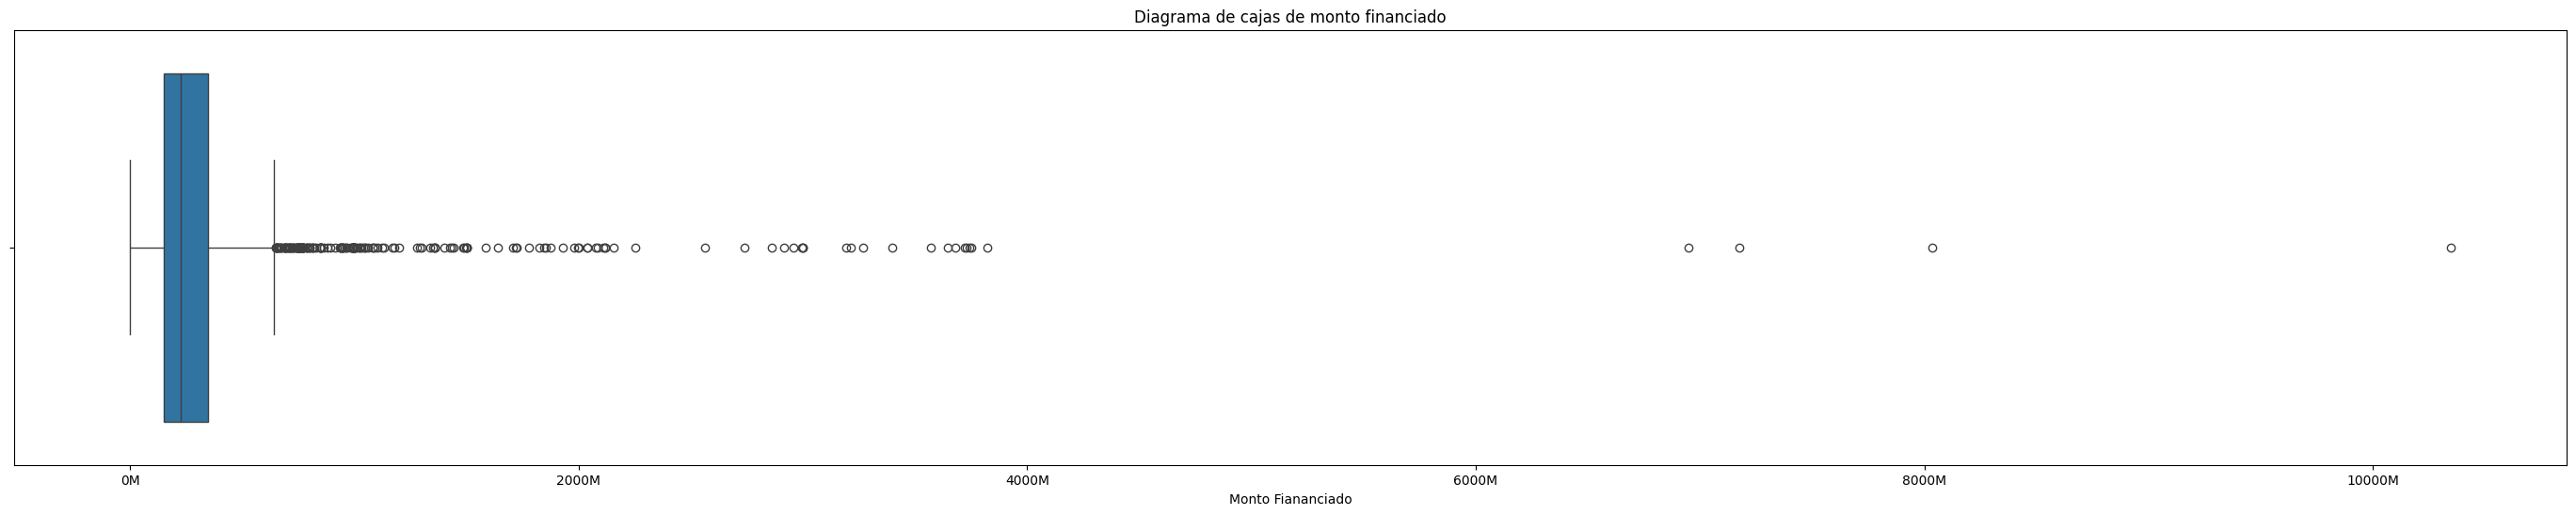

In [ ]:
plt.figure(figsize=(35, 6))
sns.boxplot(x=dfOriginal['MONTO_FINANCIADO_AP'])
plt.title('Diagrama de cajas de monto financiado')
plt.xlabel('Monto Fiananciado')
# Formatear los valores del eje x en millones
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M')  # Dividir por 1 millón y agregar "M"
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

In [ ]:
projectosEnCero=(dfOriginal['MONTO_FINANCIADO_AP']==0).sum()
print(f"de los 3097 datos registrados {projectosEnCero} no tienen monto financiado ")

de los 3097 datos registrados 295 no tienen monto financiado 


# **5 Limpieza de datos**

## 5.1 Eliminar filas donde 'MONTO_FINANCIADO_AP' es 0

In [ ]:
df1 = dfOriginal[dfOriginal['MONTO_FINANCIADO_AP'] != 0]

##**5.2 Eliminar datos atipicos**

### 5.2.1 Calcular el rango intercuartílico (IQR)

In [ ]:
Q1 = df1['MONTO_FINANCIADO_AP'].quantile(0.25)
Q3 = df1['MONTO_FINANCIADO_AP'].quantile(0.75)
IQR = Q3 - Q1

### 5.2.2 Definir los límites para identificar outliers

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

### 5.2.3 Filtrar los outliers

In [ ]:
df1 = df1[(df1['MONTO_FINANCIADO_AP'] >= lower_bound) &(df1['MONTO_FINANCIADO_AP'] <= upper_bound)]

### 5.2.4 Grafico de cajas después de eliminar los ceros y los outliers

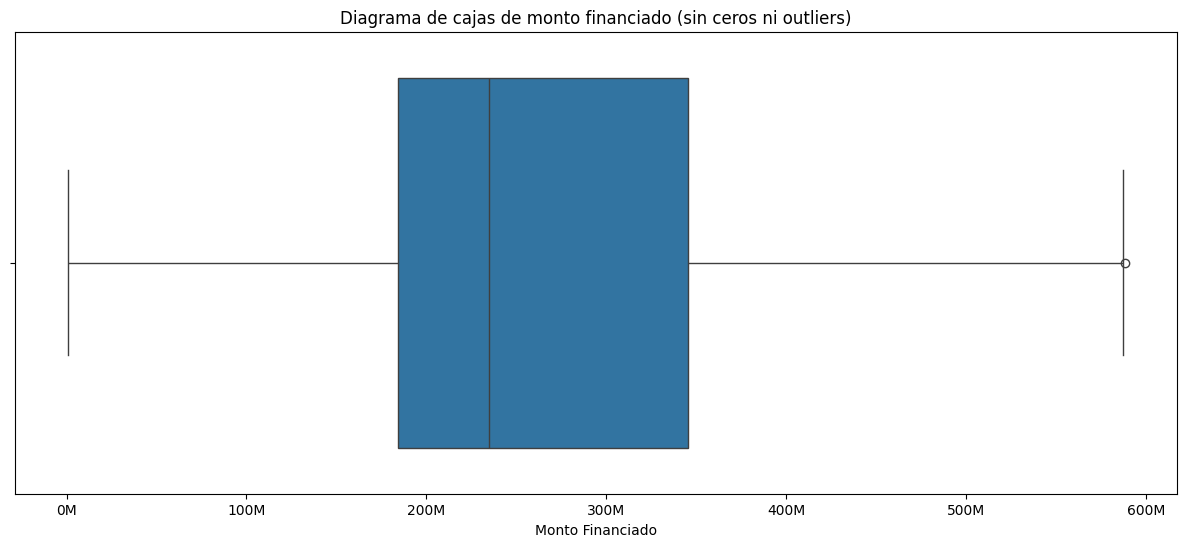

In [ ]:

plt.figure(figsize=(15, 6))
sns.boxplot(x=df1['MONTO_FINANCIADO_AP'])
plt.title('Diagrama de cajas de monto financiado (sin ceros ni outliers)')
plt.xlabel('Monto Financiado')

# Formatear los valores del eje x en millones (opcional)
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M')
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

In [ ]:
df1.describe()

,PROYECTO_ID,CONVOCATORIA_ID,ANO_CONVOCATORIA,CODIGO_PROYECTO,COD_PROG_CTI,COD_DANE_CIUDAD_ENTIDAD,COD_DANE_DEPTO_ENTIDAD,COD_DANE_CIUDAD_PRY,COD_DANE_DEPTO_PRY,MONTO_FINANCIADO_AP,MONTO_CONTRAPARTIDA_AP,MONTO_TOTAL_AP
count,2586.000000,2586.000000,2586.000000,2.586000e+03,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2.586000e+03,2.586000e+03,2.586000e+03
mean,48273.956303,11223.090101,2013.190642,1.827482e+11,69.763728,23339.537510,23.313998,24533.706883,24.492266,2.540990e+08,2.703747e+08,5.240535e+08
std,10395.633473,571.558938,3.278735,1.656767e+11,103.804679,25535.070403,25.528723,26340.801699,26.317922,1.180759e+08,2.370480e+08,3.087222e+08
min,30367.000000,-604.000000,2007.000000,1.416324e+10,1.000000,0.000000,0.000000,0.000000,0.000000,6.039960e+05,0.000000e+00,1.797661e+06
25%,38864.500000,11168.000000,2010.000000,1.107778e+11,6.000000,5001.000000,5.000000,5001.000000,5.000000,1.840523e+08,1.340000e+08,3.254805e+08
50%,45649.500000,11215.000000,2012.000000,1.120730e+11,16.000000,11001.000000,11.000000,11001.000000,11.000000,2.348547e+08,2.104278e+08,4.792059e+08
75%,54755.000000,11323.000000,2016.000000,1.299619e+11,154.000000,25175.000000,25.000000,41537.750000,41.000000,3.453568e+08,3.340000e+08,6.595002e+08
max,82694.000000,11510.000000,2020.000000,2.213102e+12,374.000000,91001.000000,91.000000,99001.000000,99.000000,5.881273e+08,3.227635e+09,3.591207e+09


Desviación estándar (std):

Antes: 450,251,000 COP

Después: 118,075,900 COP

Disminución significativa, lo que indica una menor dispersión en los datos tras eliminar valores extremos.

El diagrama nos muestar que

##**5.3 Cambio de tipo de dato en Fechas**

In [ ]:
df1['FECHA_REGISTRO'] = pd.to_datetime(df1['FECHA_REGISTRO'], format='%d/%m/%Y')
df1['FECHA_APROBACION'] = pd.to_datetime(df1['FECHA_APROBACION'], format='%d/%m/%Y')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2586 entries, 25 to 3096
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PROYECTO_ID              2586 non-null   int64         
 1   CONVOCATORIA_ID          2586 non-null   int64         
 2   ANO_CONVOCATORIA         2586 non-null   int64         
 3   DESC_CONVOCATORIA        2586 non-null   object        
 4   CODIGO_PROYECTO          2586 non-null   int64         
 5   TITULO_PROYECTO          2586 non-null   object        
 6   FECHA_REGISTRO           2586 non-null   datetime64[ns]
 7   FECHA_APROBACION         2586 non-null   datetime64[ns]
 8   ENTIDAD_EJECUTA          2586 non-null   object        
 9   TIPO_FINANCIACION        2586 non-null   object        
 10  DESC_FINANCIACION        2586 non-null   object        
 11  COD_PROG_CTI             2586 non-null   int64         
 12  NME_PROG_CTI             2586 non-null

## 5.4 Datos faltantes


### 5.4.1 Datos Faltantes por departamento

In [ ]:
ciudadesNoDisponible=df1[df1['NME_DEPTO_PRY']=='No disponible']
noDisponible=ciudadesNoDisponible['NME_DEPTO_PRY'].value_counts()
noDisponible

,count
NME_DEPTO_PRY,
No disponible,18


Completar departamentos

In [ ]:
dfLimpieza=df1

dfLimpieza.loc[dfLimpieza['NME_DEPTO_PRY'] == 'No disponible', 'NME_DEPTO_PRY'] = dfLimpieza.loc[dfLimpieza['NME_DEPTO_PRY'] == 'No disponible', 'NME_DEPTO_ENTIDAD']
ciudadesNoDisponible=dfLimpieza[dfLimpieza['NME_DEPTO_PRY']=='No disponible']
ciudadesNoDisponible

,PROYECTO_ID,CONVOCATORIA_ID,ANO_CONVOCATORIA,DESC_CONVOCATORIA,CODIGO_PROYECTO,TITULO_PROYECTO,FECHA_REGISTRO,FECHA_APROBACION,ENTIDAD_EJECUTA,TIPO_FINANCIACION,...,NME_DEPTO_ENTIDAD,COD_DANE_CIUDAD_PRY,NME_CIUDAD_PRY,COD_DANE_DEPTO_PRY,NME_DEPTO_PRY,TPO_PROYECTO,NME_TIPO_PROYECTO,MONTO_FINANCIADO_AP,MONTO_CONTRAPARTIDA_AP,MONTO_TOTAL_AP


Grafico que muestra la distribucion de los datos por departamento

<Axes: xlabel='count', ylabel='NME_DEPTO_PRY'>

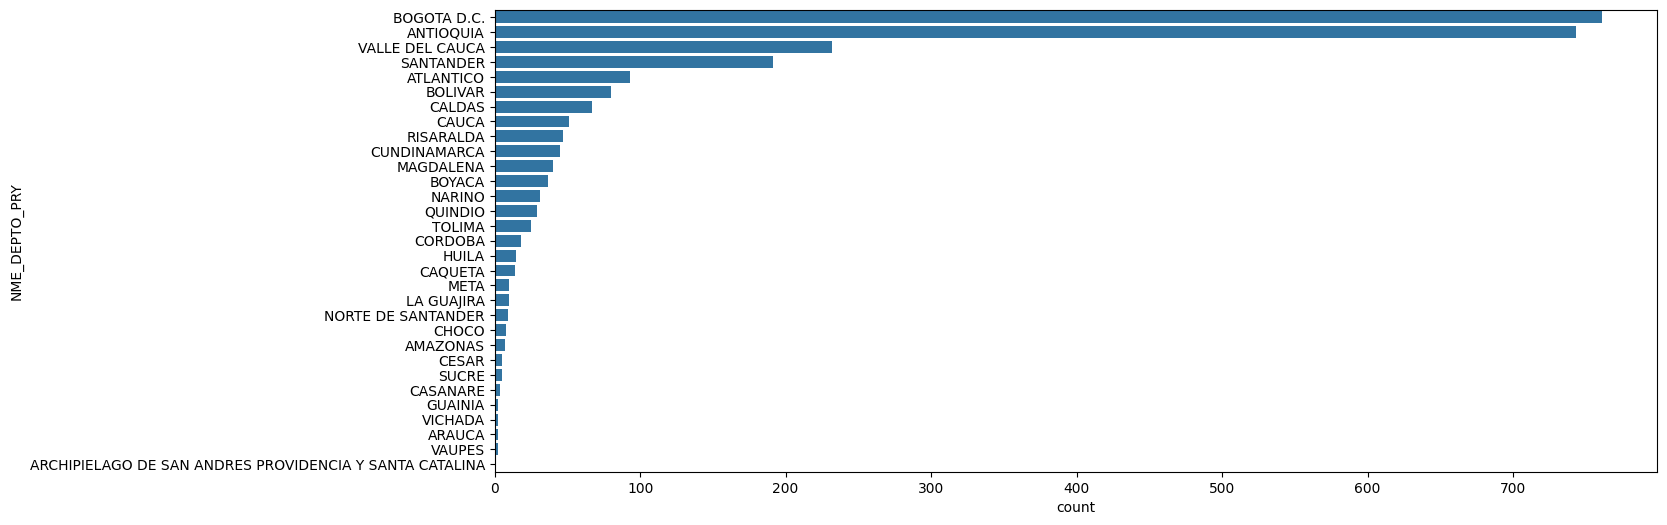

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(y='NME_DEPTO_PRY', data=dfLimpieza, order=dfLimpieza['NME_DEPTO_PRY'].value_counts().index)

### 5.4.2 Datos faltantes por Area de ciencia

In [ ]:
nuevo_df = dfLimpieza.loc[:, ['NME_AREA_CIENCIA', 'MONTO_FINANCIADO_AP', 'AREA_TEMATICA']]
nuevo_df

,NME_AREA_CIENCIA,MONTO_FINANCIADO_AP,AREA_TEMATICA
25,No disponible,334890746,SALUD MENTAL Y CONSTRUCCION DE PAZ
26,No disponible,299999627,SALUD MATERNA Y PERINATAL
27,No disponible,198752714,SISTEMAS Y SERVICIOS DE ATENCION EN SALUD.
28,No disponible,400000000,CONDICIONES CRONICAS NO TRANSMISIBLES.
29,No disponible,376086705,CONDICIONES CRONICAS NO TRANSMISIBLES.
...,...,...,...
3092,No disponible,299843934,BIOINSUMOS BIOPRODUCTOS TECNOLOGIAS REPRODUCTI...
3093,No disponible,499405594,MICROORGANISMOS EXTREMOFILOS
3094,No disponible,300000000,BIOINSUMOS BIOPRODUCTOS TECNOLOGIAS REPRODUCTI...
3095,No disponible,71370000,INGREDIENTES ACTIVOS O BIOTECNOLOGIAS PARA EL ...


In [ ]:

ciudadesNoDisponible=dfLimpieza[dfLimpieza['TITULO_PROYECTO']=='No disponible']
noDisponible=ciudadesNoDisponible['TITULO_PROYECTO'].value_counts()
noDisponible

,count
TITULO_PROYECTO,


<Axes: xlabel='count', ylabel='NME_AREA_CIENCIA'>

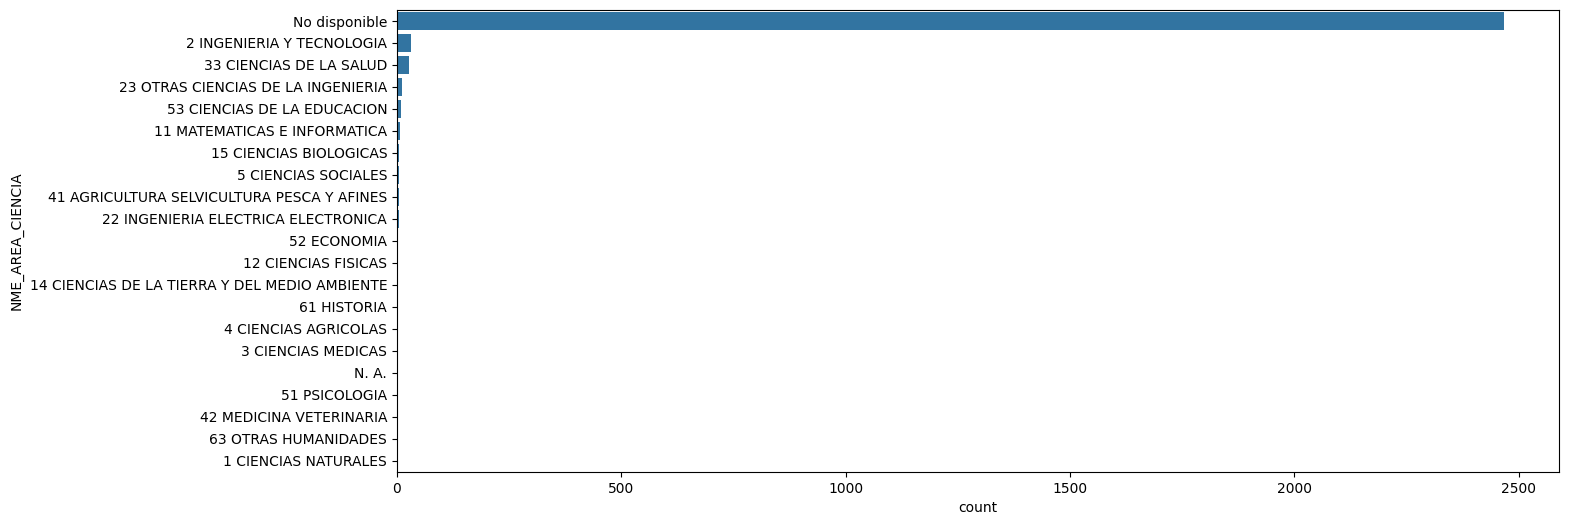

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(y='NME_AREA_CIENCIA', data=dfLimpieza, order=dfLimpieza['NME_AREA_CIENCIA'].value_counts().index)

In [ ]:
ciudadesNoDisponible=dfLimpieza[dfLimpieza['NME_AREA_CIENCIA']=='No disponible']
noDisponible=ciudadesNoDisponible['NME_AREA_CIENCIA'].value_counts()
noDisponible

,count
NME_AREA_CIENCIA,
No disponible,2467


In [ ]:
nuevo_df = dfLimpieza[['TITULO_PROYECTO', 'NME_AREA_CIENCIA']]
nuevo_df


In [ ]:
nuevo_df.to_csv('nuevo_df.csv', index=False)

SyntaxError: invalid syntax (<ipython-input-295-979fe6353b26>, line 1)

In [ ]:
proyectoDep = df['NME_DEPTO_PRY'].value_counts().reset_index()



<ipython-input-22-85b7200ff0e0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad_Proyectos', y='Departamento', data=proyectoDep, palette='viridis')


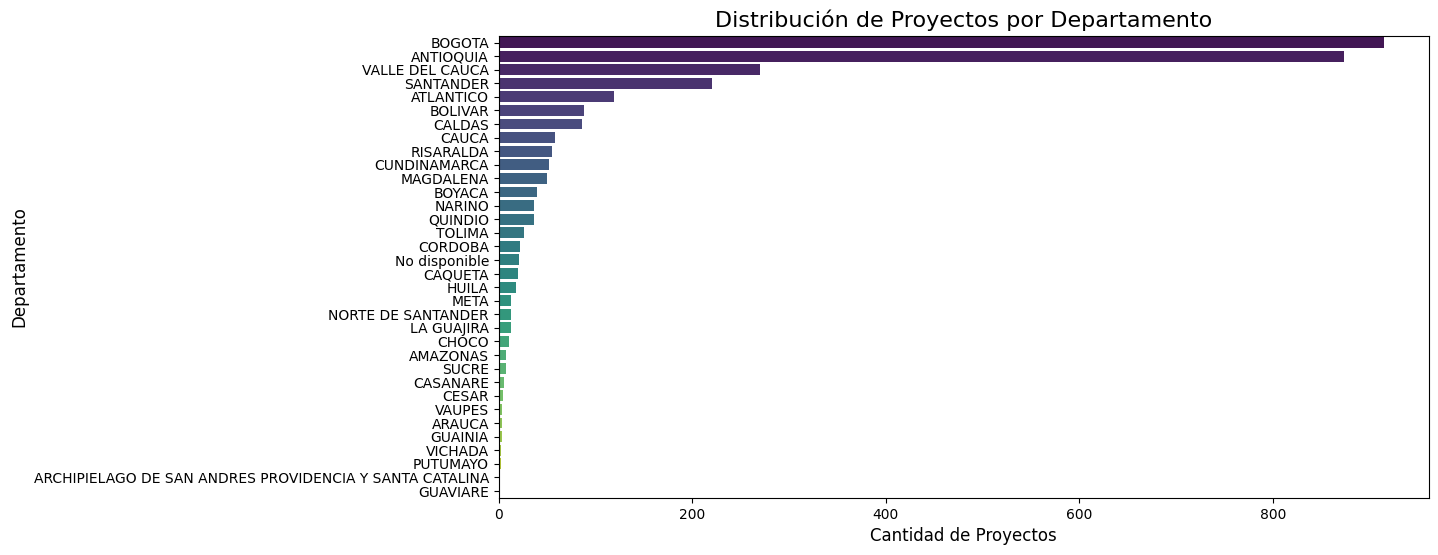

In [ ]:
proyectoDep.columns = ['Departamento', 'Cantidad_Proyectos']

plt.figure(figsize=(12, 6))
sns.barplot(x='Cantidad_Proyectos', y='Departamento', data=proyectoDep, palette='viridis')
plt.title('Distribución de Proyectos por Departamento', fontsize=16)
plt.xlabel('Cantidad de Proyectos', fontsize=12)
plt.ylabel('Departamento', fontsize=12)
plt.show()

Forma del dataset limpio: (2734, 31)


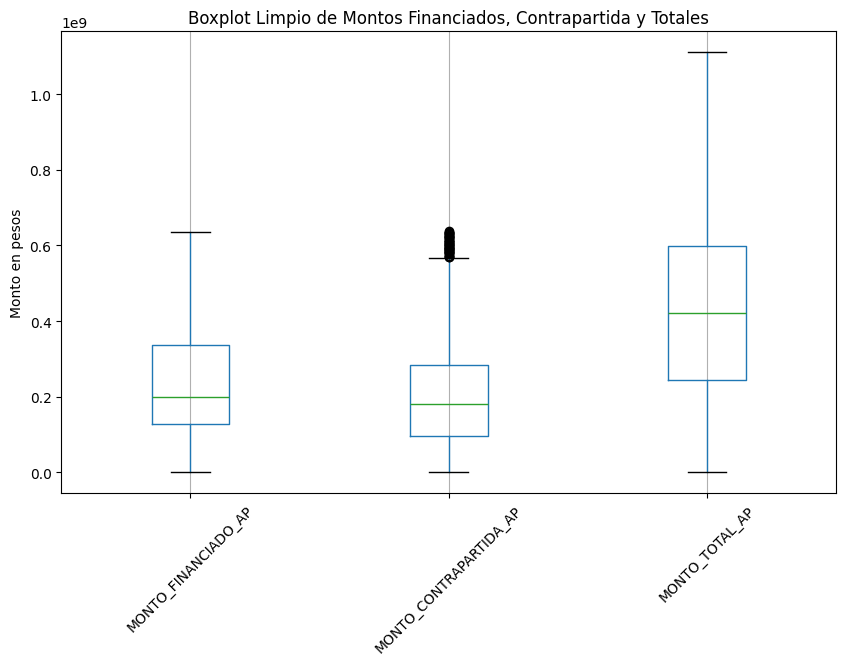

In [ ]:

# Cargar el dataset
df = pd.read_csv(ruta)

# Eliminar outliers utilizando el método del rango intercuartílico (IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Aplicar la función a cada columna financiera
columns_to_analyze = ['MONTO_FINANCIADO_AP', 'MONTO_CONTRAPARTIDA_AP', 'MONTO_TOTAL_AP']
cleaned_dataset = df.copy()
for column in columns_to_analyze:
    cleaned_dataset = remove_outliers(cleaned_dataset, column)

# Mostrar la forma del dataset limpio
print("Forma del dataset limpio:", cleaned_dataset.shape)

# Re-graficar los boxplots para confirmar los cambios
plt.figure(figsize=(10, 6))
cleaned_dataset[columns_to_analyze].boxplot()
plt.title('Boxplot Limpio de Montos Financiados, Contrapartida y Totales')
plt.ylabel('Monto en pesos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
valores_nme_tipo_proyecto = df['NME_TIPO_PROYECTO'].unique()
print("Valores únicos en NME_TIPO_PROYECTO:", valores_nme_tipo_proyecto)
valores_nme_tipo_proyecto = df['TIPO_FINANCIACION'].unique()
print("TIPO_FINANCIACION", valores_nme_tipo_proyecto)
valores_tpo_proyecto = df['TPO_PROYECTO'].unique()
print("Valores únicos en TPO_PROYECTO:", valores_tpo_proyecto)

Valores únicos en NME_TIPO_PROYECTO: ['Proyecto' 'Programa']
TIPO_FINANCIACION ['RC' 'CF' 'INOVA' 'RO' 'AT' 'MX' 'RT' 'RCP' 'CE' 'RCMINTIC' 'RCGP' 'RCDS'
 'RCCONSUL' 'RCI' 'RCAC' 'CFASOC']
Valores únicos en TPO_PROYECTO: ['P' 'R']


In [ ]:
df = df.drop(columns=['TPO_PROYECTO', 'NME_TIPO_PROYECTO', 'TIPO_FINANCIACION'])

### Análisis Temporal de los Proyectos Financiados

En este análisis, exploramos cómo ha evolucionado tanto el número de proyectos financiados como los montos asignados a lo largo de los años:

- **Número de Proyectos por Año**: El gráfico de barras muestra cómo la cantidad de proyectos financiados varió a lo largo del tiempo. Se observa un pico en 2010, con una disminución gradual en los años siguientes.
- **Monto Total Financiado por Año**: El gráfico de líneas refleja la variabilidad en los montos financiados, con picos en años específicos como 2010 y 2012. El monto total financiado muestra una alta fluctuación, lo que sugiere cambios en las prioridades de financiamiento.

Estos resultados proporcionan una visión general de las tendencias de inversión en los proyectos y ayudan a identificar años clave con gran inversión.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

df['FECHA_REGISTRO'] = pd.to_datetime(df['FECHA_REGISTRO'], errors='coerce', format='%d/%m/%Y')
df['ANO_REGISTRO'] = df['FECHA_REGISTRO'].dt.year

temporal_analysis = df.groupby('ANO_REGISTRO').agg(
    total_proyectos=('MONTO_FINANCIADO_AP', 'count'),
    total_financiado=('MONTO_FINANCIADO_AP', 'sum')
).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='ANO_REGISTRO', y='total_proyectos', data=temporal_analysis, palette='Blues_d')
plt.title('Número de Proyectos por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Proyectos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='ANO_REGISTRO', y='total_financiado', data=temporal_analysis, marker='o', color='orange')

formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e9:.1f}B')  # Usar 'B' para miles de millones
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Total Financiado por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Monto Total Financiado (COP)', fontsize=12)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

temporal_analysis


¿En qué años se financiaron más proyectos?

Esto se responde observando el gráfico de barras "Número de Proyectos por Año", donde se identifican los años con picos significativos en la cantidad de proyectos financiados.
¿Cómo ha evolucionado la cantidad de proyectos financiados a lo largo del tiempo?

Este gráfico también muestra tendencias de crecimiento o disminución en la cantidad de proyectos a lo largo de los años.
¿Qué años tuvieron los mayores montos totales financiados?

El gráfico de líneas "Total Financiado por Año" refleja los años con mayores picos de financiamiento total.
¿Hay relación entre el número de proyectos y el monto total financiado?

Comparando ambos gráficos, se puede analizar si los años con más proyectos financiados también coinciden con los mayores montos totales financiados.
¿Se observa alguna tendencia general en el financiamiento después de 2015?

El gráfico de líneas muestra una disminución significativa en los montos financiados después de 2015, lo que permite investigar posibles causas de esta tendencia.